4. Una caja cuántica tiene 3 electrones, 2 protones y 3 neutrones. Se selecciona una muestra aleatoria de 4 partículas. Si x es el número de electrones e y es el número de protones.

a)
El Numero total de formas de escoger 4 particulas entre diez es: $$Total={8 \choose 4} $$


El numero de  formas de escoger $x$ electrones esta dado por:

$$formas_{electrones}(x)={3 \choose x}$$

Similarmente para protones:
$$formas_{protones}(x)={2 \choose y}$$

para neutrones:
$$formas_{neutrones}(x)={3 \choose 4-x-y}$$

Por lo que el numero de formas de escoger $x$ electrones, $y$ protones y $4-x-y$ neutrones es:

$$formas={3 \choose x}{2 \choose y}{3 \choose 4-x-y}$$

Por lo que la probabilidad de escoger $x$ electrones, y $y$ protones es:

$$f(x)=\frac{formas}{Total}\=\frac{{3 \choose x}{2 \choose y}{3 \choose 4-x-y}}{8 \choose 4}\$$

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
def f2(x,y):
  return (np.math.comb(3,x)*np.math.comb(2,y)*np.math.comb(3,4-x-y))/np.math.comb(8,4)

In [3]:
P=np.zeros((4,3))
x=np.array([0,1,2,3])
y=np.array([0,1,2])
for i in x:
  for j in y:
    if i+j<=4:
      P[i,j]=f2(i,j)

B) Hallar las distribuciones marginales $g(x)$ y $h(y)$.

In [4]:
g_x=np.sum(P,axis=1)
h_y=np.sum(P,axis=0)
print(g_x[0],h_y[0])

0.07142857142857142 0.2142857142857143


C)Halle el valor esperado de electrones $\mathbb{E}(x)$.

In [16]:
E_x=np.sum(g_x*x)
print(E_x,105/70)

1.4999999999999998 1.5


D) Halle el valor esperado de electrones $\mathbb{E}(y)$.

In [17]:
E_y=np.sum(h_y*y)
print(E_y,1)

1.0 1


E) alcular la covarianza usando $\sigma_{xy} = \mathbb{E}(xy) - \mathbb{E}(x)\mathbb{E}(y)$.

In [18]:
E_xy=0
for i in x:
  for j in y:
    E_xy+=i*j*P[i,j]
COV1=E_xy-E_x*E_y
print(COV1,-3/14)

-0.2142857142857142 -0.21428571428571427


F) Calcular la covarianza usando: $\sigma_{xy} = \mathbb{E}((x - \mu_x)(y-\mu_y))$.

In [19]:
COV2=0
for i in x:
  for j in y:
    if i+j<=4:
      COV2+=(i-E_x)*(j-E_y)*P[i,j]
print(COV2,-3/14)

-0.2142857142857143 -0.21428571428571427


G) Son las variables x e y independientes?

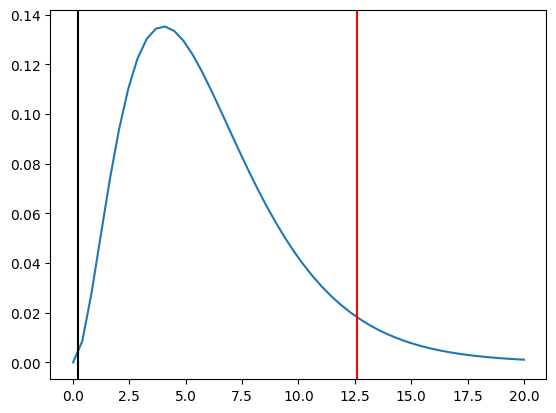

In [20]:
po=np.zeros_like(P)
for i in range(4):
    for j in range(3):
        po[i,j]=g_x[i]*h_y[j]
        
fo=P
fe=po

def GetChi2(x,y):
    return np.sum((x-y)**2/y)

ObsChi2=GetChi2(fo,fe)
df=6

CriChi2=chi2.ppf(0.95,df=df)

x = np.linspace(0,20,50)
y = chi2.pdf(x,df=df)
plt.plot(x,y)
plt.axvline(x=ObsChi2,color='k')
plt.axvline(x=CriChi2,color='r')

CL=chi2.cdf(ObsChi2,df=df)
pvalue=1-CL

In [21]:
po,P

(array([[0.01530612, 0.04081633, 0.01530612],
        [0.09183673, 0.24489796, 0.09183673],
        [0.09183673, 0.24489796, 0.09183673],
        [0.01530612, 0.04081633, 0.01530612]]),
 array([[0.        , 0.02857143, 0.04285714],
        [0.04285714, 0.25714286, 0.12857143],
        [0.12857143, 0.25714286, 0.04285714],
        [0.04285714, 0.02857143, 0.        ]]))

In [22]:
pvalue

0.9997956866976904

En este ejercicio la covarianza tiene un valor de alrededor de -3/14, de modo que las variables tienen una dependencia 